 # Titanic Project

### Problem Statement: 
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 
1912. It gives you information about multiple people like their ages, sexes, sibling 
counts, embarkment points, and whether or not they survived the disaster. Based on 
these features, you have to predict if an arbitrary passenger on Titanic would survive the 
sinking or not.

 # Data Collection and Loading

In [1]:
# import libraries
import numpy as np # preform numerical operation
import pandas as pd # for data manupulation
import seaborn as sns # use for data visualization
import matplotlib.pyplot as plt
# Load the Titanic dataset
df = pd.read_csv(r"F:\Project 1.0\Project 15.0\titanic_train.csv")
df.head()  # Display the first few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Data Collection: The data is read into a DataFrame using pd.read_csv().
#Initial Exploration: data.info() and data.head() provide an overview of the columns, data types, and a preview of the data.

# Data Preprocessing

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10904\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10904\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [5]:
# Missing Values:
# Age is filled with the median to retain distribution characteristics.
# Embarked is filled with the mode to maintain the most common boarding point.

In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Drop 'Cabin' due to a high number of missing values and irrelevant columns
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)


In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [10]:
# Encode categorical variables ('Sex' and 'Embarked')
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
#Encoding: One-hot encoding is applied to Sex and Embarked, using drop_first=True to avoid multicollinearity.

In [11]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [12]:
# Standardize 'Age' and 'Fare'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True
4,5,0,3,0.433312,0,0,-0.486337,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.181487,0,0,-0.386671,True,False,True
887,888,1,1,-0.796286,0,0,-0.044381,False,False,True
888,889,0,3,-0.104637,1,2,-0.176263,False,False,True
889,890,1,1,-0.258337,0,0,-0.044381,True,False,False


# EDA( Exploratory Data Analysis)

C:\Users\HP\AppData\Local\Temp\ipykernel_10904\3584106310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


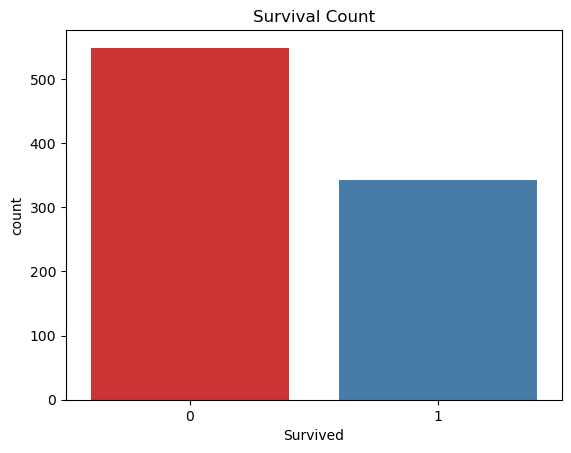

In [13]:
# Survived vs Non-Survived
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survival Count')
plt.show()

In [14]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


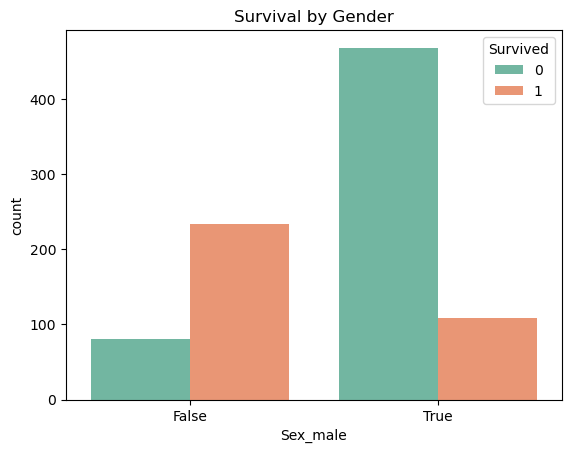

In [16]:
# Survival by Gender
sns.countplot(x='Sex_male', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.show()

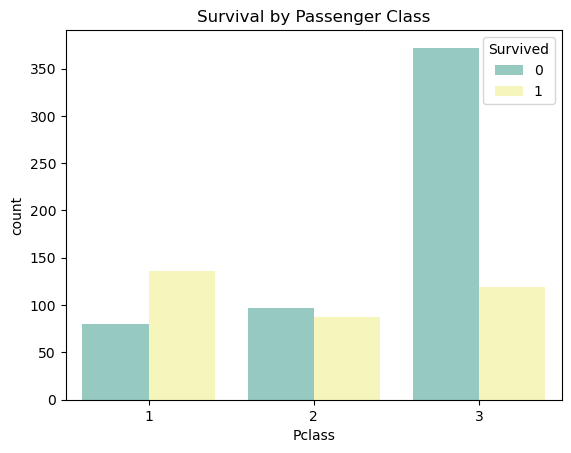

In [18]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.show()

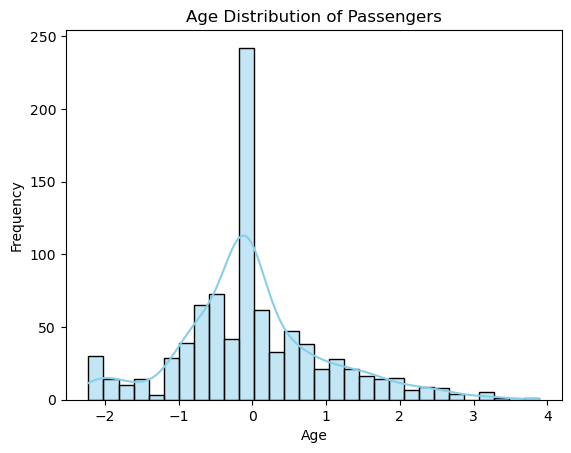

In [19]:
# Age Distribution
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue', bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets completed.")



Data split into training and testing sets completed.


In [21]:
# Feature-Target Split: X contains all columns except Survived (target), and y contains the target variable.
#Train-Test Split: 80% of the data is used for training and 20% for testing.

# Model Selection and Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# initialize models
models = {
    "Linear Regression" : LinearRegression(),
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC()
}
# perform cross-validation for each model
print ("\n cross-validation Result:")
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print (f"{model_name} Mean Accuracy: {scores.mean():.2f}")


 cross-validation Result:
Linear Regression Mean Accuracy: 0.37


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Mean Accuracy: 0.79
Decision Tree Mean Accuracy: 0.72
Random Forest Mean Accuracy: 0.81
Support Vector Machine Mean Accuracy: 0.62


 # Model Training and Evaluation

In [25]:
# Train the best model (Random Forest)
Best_model = RandomForestClassifier()
Best_model.fit(X_train, y_train)
# predictions and evalution
y_pred = Best_model.predict(X_test)
# Evalution metrics
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[91 14]
 [20 54]]


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)

# Evaluate the best model from grid search
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

print("\nEvaluation for Tuned Model:")
print(classification_report(y_test, y_pred_grid))



Best Parameters from Grid Search:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Evaluation for Tuned Model:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



# Saving Model using Pickle

In [30]:
import pickle

# Save the model using pickle
with open('best_model.pickle', 'wb') as f:
    pickle.dump(Best_model, f)
